#  TensorFlowを用いた犬猫認識アプリ

Kaggleコンペ(https://www.kaggle.com/c/dogs-vs-cats)　からデータセットをダウンロード

dir.ipynbで作成した学習ディレクトリと検証ディレクトリを用いて犬猫認識アプリの機械学習モデルを作っていく

train.zipには犬と猫の画像がランダムに12500ずつ、計25000枚入っている。

dir.ipynbで学習用に使う画像と検証用に使うデータそれぞれ12500枚ずつに分けた。

その際データの再現性を高めるために、画像データを昇順に並べてデータを分けた。

『わかりやすく』

trainデータ(猫12500、犬12500)を昇順に並べる

↓

train_cats(0〜6249の6500データ),train_dogs(0〜6249の6500データ)

test_cats(6500〜12499の6500データ),test_dogs(6500〜12499の6500データ)

・データ構造

dogs-vs-cats.zip

|

|-sampleSubmission.csv

|-test1.zip

|-train.zip

      |-train_cats(dir.ipynbで作成)(6250枚の猫の画像)

      |-test_cats(dir.ipynbで作成)(6250枚の犬の画像)

      |-train_dogs(dir.ipynbで作成)(6250枚の猫の画像)

      |-test_dogs(dir.ipynbで作成)(6250枚の犬の画像)

# 流れ

学習データを学習に使うデータと検証に使うデータに分ける

↓

学習に使うデータでTensolFlowを用いて学習

検証に使うデータでTebsorFlowを用いて検証

モデルを作成(ここまで)

↓

検証データ(test1)を予測
(kaggle提出用)

test1データは犬猫の画像データがランダムに区別なく入っているデータのため今回は使わない。

# データの準備

train_cats.zip、test_cats.zip、train_dogs.zip、test_cats.zip.zipを解凍する

In [ ]:
!unzip "drive/MyDrive/portfolio/dogs_vs_cats/train.zip" -d "drive/MyDrive/portfolio/dogs_vs_cats/"

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1250.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1251.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1252.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1253.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1254.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1255.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1256.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1257.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1258.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1259.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.1260.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs

In [ ]:
!unzip "drive/MyDrive/portfolio/dogs_vs_cats/test.zip" -d "drive/MyDrive/portfolio/dogs_vs_cats/"

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7500.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7501.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7502.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7503.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7504.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7505.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7506.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7507.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7508.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7509.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7510.jpg  
  inflating: drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/dog.7511.jpg  
  inflat

In [ ]:
train_path = "/content/drive/MyDrive/portfolio/dogs_vs_cats/train"
test_path = "/content/drive/MyDrive/portfolio/dogs_vs_cats/test"

TensorFlowのバージョン確認

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

print(tf.__version__)

2.4.0


画像データの確認

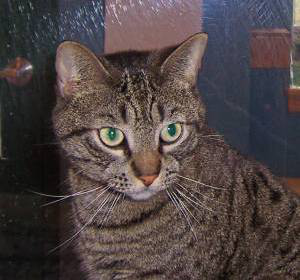

In [ ]:
from PIL import Image

img_cat1 = '/content/drive/MyDrive/portfolio/dogs_vs_cats/train/train_cats/cat.1.jpg'
Image.open(img_cat1)

画像データ形式の整備

設定

バッチサイズを625、学習の回数を10回、エポックサイズを10、画像の縦横のサイズ280*300

In [ ]:
BATCH_SIZE = 125
NUM_CLASSES = 10
EPOCHS = 10

cat.1.jpgが縦280×横300ピクセルなので、全てこれに合わせる

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)
 
train_generator = train_data.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_generator = test_data.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 12500 images belonging to 2 classes.
Found 12500 images belonging to 2 classes.


In [ ]:
for data,label in train_generator:
    print(data.shape)
    print(label.shape)
    break

(125, 150, 150, 3)
(125,)


In [ ]:
print(label)

[0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1.]


# TensorFlowによる学習

ソーケンシャルモデル指定

In [ ]:
from keras.models import Sequential

model = Sequential()

学習モデルの構築

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

ニューラルネットワークの構築

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 341056)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               43655296  
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
# ネットのやり方

# from keras import layers
# from keras import models
 
# model = models.Sequential()
# model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
# model.add(layers.MaxPooling2D((2,2)))
 
# model.add(layers.Conv2D(64,(3,3),activation="relu"))
# model.add(layers.MaxPooling2D((2,2)))
 
# model.add(layers.Conv2D(128,(3,3),activation="relu"))
# model.add(layers.MaxPooling2D((2,2)))
 
# model.add(layers.Conv2D(128,(3,3),activation="relu"))
# model.add(layers.MaxPooling2D((2,2)))
 
# model.add(layers.Flatten())
 
# model.add(layers.Dense(512,activation="relu"))
# model.add(layers.Dense(1,activation="sigmoid"))
 
# model.summary()

In [ ]:
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
# ネットのやり方

# from keras import optimizers
 
# model.compile(loss="binary_crossentropy",
#              optimizer=optimizers.RMSprop(lr=1e-4),
#              metrics=["accuracy"])

学習

In [ ]:
def plot_loss_accuracy_graph(fit_record):
  # 青い線で誤差の履歴をプロット、検証時誤差は黒い線
  plt.plot(fit_record.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(fit_record.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title('LOSS')
  plt.xlabel('EPOCHS')
  plt.ylabel('LOSS')
  plt.legend(loc='upper right')
  plt.show()

  # 緑の線で精度の履歴をプロットする、検証時精度は黒い線で
  plt.plot(fit_record.history['accuracy'], "-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(fit_record.history['val_accuracy'], "-o", color="black", label="val_accuracy", linewidth=2)
  plt.title('ACCURACY')
  plt.xlabel('EPOCHS')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
print('反復回数:', EPOCHS)
# fit_record = model.fit(train_data, train_teacher_labels, batch_size=BATCH_SIZE,　epochs=EPOCHS, verbose=1, validation_data=(test_data, test_teacher_labels))
fit_record = model.fit_generator(train_generator, steps_per_epoch=100, epochs=EPOCHS, validation_data=test_generator, validation_steps=100)

反復回数: 10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 97s 964ms/step - loss: 0.6951 - accuracy: 0.4979 - val_loss: 0.6879 - val_accuracy: 0.5745
Epoch 2/10
100/100 [==============================] - 96s 958ms/step - loss: 0.6880 - accuracy: 0.5408 - val_loss: 0.6838 - val_accuracy: 0.5720
Epoch 3/10
100/100 [==============================] - 94s 946ms/step - loss: 0.6852 - accuracy: 0.5506 - val_loss: 0.6801 - val_accuracy: 0.5772
Epoch 4/10
100/100 [==============================] - 95s 949ms/step - loss: 0.6824 - accuracy: 0.5596 - val_loss: 0.6763 - val_accuracy: 0.5854
Epoch 5/10
100/100 [==============================] - 95s 951ms/step - loss: 0.6768 - accuracy: 0.5752 - val_loss: 0.6723 - val_accuracy: 0.5923
Epoch 6/10
100/100 [==============================] - 94s 941ms/step - loss: 0.6756 - accuracy: 0.5753 - val_loss: 0.6690 - val_accuracy: 0.5921
Epoch 7/10
100/100 [==============================] - 94s 942ms/step - loss: 0.6718 - accuracy: 0.5806 - val_loss: 0.6657 - val_ac

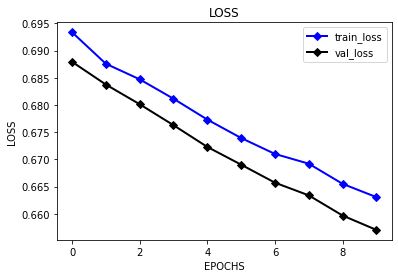

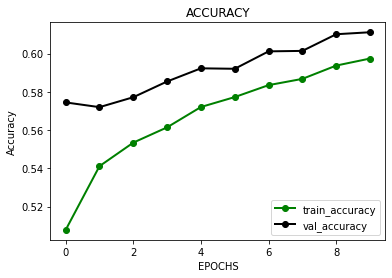

In [ ]:
import matplotlib.pyplot as plt

plot_loss_accuracy_graph(fit_record)

検証

In [ ]:
result_score = model.evaluate_generator(test_generator, steps=100)
print(result_score)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6570250988006592, 0.6111999750137329]


上の図と同じ結果が返された。
誤差が高く、精度が低いモデルなので信用性に欠ける。

In [ ]:
print('検証誤差:', result_score[0])
print('検証時精度:', result_score[1])

検証誤差: 0.6570250988006592
検証時精度: 0.6111999750137329


予測

In [ ]:
print(train_generator.class_indices)

{'train_cats': 0, 'train_dogs': 1}


In [139]:
from PIL import Image
import numpy as np

# 予測できるように画像の配列を整備
im = Image.open('/content/drive/MyDrive/portfolio/dogs_vs_cats/test/test_cats/cat.6500.jpg')
im = im.resize((150, 150))
im = np.expand_dims(im, axis=0)
im = np.array(im, np.float32)
im /= 255

#予測
result_predict = model.predict(im)
print(result_predict)
if result_predict < 0.50:
  print('予測結果は猫です。')
else:
  print('予測結果は犬です。')

[[0.52019846]]
予測結果は犬です。


In [ ]:
# ネットのやり方

# import numpy as np
# from keras.preprocessing import image

# img = '/content/drive/MyDrive/portfolio/dogs_vs_cats/test/test_cats/cat.6500.jpg'

# #予測モデルに入力できるように画像を配列に落とし込む
# img = image.load_img(img, target_size=(150, 150))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = x / 255.0
# #予測
# result_predict = model.predict(x)
# print(result_predict)

[[0.52450377]]


モデルの保存

In [ ]:
model.save('original_dogs_cats.h5')

In [ ]:
import os

print(os.path.abspath('original_dogs_cats.h5'))

/content/original_dogs_cats.h5
